# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

https://wiki.csc.calpoly.edu/datasets/wiki/Houses

To make it simpler for this assignment, the dataset has been slightly modified.  It contains the following fields:

1.	MLS: Multiple listing service number for the house (unique ID).
2.	Price: the most recent listing price of the house (in dollars).
3.	Bedrooms: number of bedrooms.
4.	Bathrooms: number of bathrooms.
5.	Size: size of the house in square feet.
6.	Price/SQ.ft: price of the house per square foot.

The model predict the housing price given the square footage of the house.


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


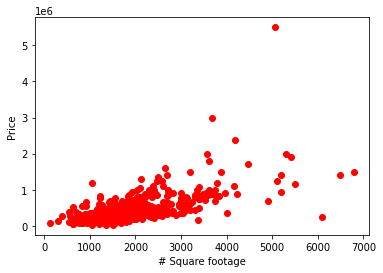

In [3]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [4]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure 
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1)) 
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)                
y = y.reshape(len(X),1) 

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

(781, 2)
(781, 1)


In [5]:
# Caution:
print(X[1:5,:], '\n')  # Hence take X[i,1]

[[1.         0.40389222]
 [1.         0.43592814]
 [1.         0.51197605]
 [1.         0.16901198]] 



## Perform gradient descent

In [11]:
# Initialize vector w 
np.random.seed(20)
w = np.random.rand(2,1)
w0 = w[0]
w1 = w[1]

# Learning rate
nu = 0.01

# number of training examples
m = len(y)

# Number of epochs
MAX_EPOCHS = 2000

mse = []  

# Loop for 2000 epochs
for itr in range (0, MAX_EPOCHS):
 
    # TO DO: Use update equation to find w0, w1 
    # Your code goes here ...
    ## Hint: you need another 'for' loop for the summation



    for itr2 in range (0,m):
      temp_w0 = (w0+w1*X[itr2,1]-y[itr2])
      stored_w0 = temp_w0+stored_w0
      temp_w0 = 0

    for itr3 in range (0,m):
      temp_w1 = temp_w1+((w0 + w1 * X[itr3,1]-y[itr3])*X[itr3,1])
      stored_w1 = temp_w1+stored_w1
      temp_w1 = 0

    w0 = w0-nu*(stored_w0/m)
    w1 = w1-nu*(stored_w1/m)

    stored_w0 = 0
    stored_w1 = 0
    
    # Compute mse
    # Here's an example of vectorization
    yhat = np.dot(X,[w0,w1])
    mse.append(np.sum((yhat-y)**2) / (2*len(y)))

In [12]:
### IMPORTANT ###
## If non-vectorized, then need to form w
w = np.array([w0,w1])

print("w= ",w,"\n")
print("mse = ", mse, "\n")

w=  [[257017.52338477]
 [535530.62076414]] 

mse =  [132529284022.67125, 130956266501.48488, 129416300525.40536, 127908688650.32318, 126432748150.24016, 124987810706.67386, 123573222104.61694, 122188341934.9121, 120832543302.90805, 119505212543.26375, 118205748940.77092, 116933564457.06834, 115688083463.12283, 114468742477.35616, 113274989909.29773, 112106285808.64755, 110962101619.63408, 109841919940.5563, 108745234288.40019, 107671548868.42181, 106620378348.59396, 105591247638.81158, 104583691674.75731, 103597255206.32782, 102631492590.52509, 101685967588.71803, 100760253168.18289, 99853931307.83139, 98966592808.03876, 98097837104.48483, 97247272085.92386, 96414513915.79958, 95599186857.62508, 94800923104.04745, 94019362609.51976, 93254152926.50397, 92504949045.13074, 91771413236.24281, 91053214897.7503, 90350030404.22885, 89661542959.69136, 88987442453.46674, 88327425319.12013, 87681194396.3503, 87048458795.80125, 86428933766.72699, 85822340567.44861, 85228406338.54552, 84646863978.

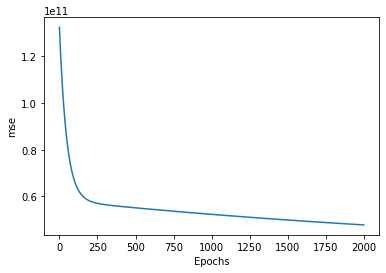

In [13]:
### Plot mse vs iterations
plt.plot(mse)  
plt.xlabel("Epochs")
plt.ylabel("mse")
plt.show()

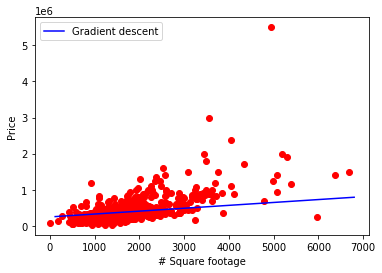

In [14]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)
yhat = np.array(yhat).flatten()

plt.plot(X[:,1] * max_min, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()


In [15]:
### Print the weight vector w
print (w)

[[257017.52338477]
 [535530.62076414]]


In [16]:
### Predict the price of a 5000 sqft house
### Re-normalize it first
sqft = 5000
norm_sqft = (sqft - Xmin)/max_min

# TO DO: print the price of the house using the renormalized sqft
# Your code goes here ...

yhat = w0+w1*(norm_sqft)

yhat_float = np.float(yhat)
yhat_format = "{:.2f}".format(yhat_float)

print("Estimated price for a",sqft,"sqft house is $",yhat_format,"\n")

Estimated price for a 5000 sqft house is $ 648243.49 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # This is added back by InteractiveShellApp.init_path()
